# Online Retail Data Clustering

## Additional Variable Information
1. InvoiceNo: Invoice numberr. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
6. UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
7. CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal. The name of the country where a customer resides.

#Step 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

!pip install kagglehub

import kagglehub
warnings.filterwarnings('ignore')

#Step 2: Loading data

In [ ]:
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Dataset downloaded to:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 157MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1


In [ ]:
file_path = path + "/Online Retail.xlsx"

# Read Excel file
df = pd.read_excel(file_path)

In [ ]:
pd.set_option('display.max_columns', 999)

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df[df["CustomerID"].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [ ]:
df[df["Quantity"]< 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [ ]:
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df[df["InvoiceNo"].str.match("^\\d{6}$") == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df["InvoiceNo"].str.replace("[0-9]", "", regex= True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
df[df["InvoiceNo"].str.startswith("A")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df["StockCode"] = df["StockCode"].astype(str)
df[df["StockCode"].str.match("^\\d{5}$") == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


In [ ]:
unusual_code = df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()
print(unusual_code)

['POST' 'D' 'C2' 'DOT' 'M' 'BANK CHARGES' 'S' 'AMAZONFEE' 'DCGS0076'
 'DCGS0003' 'gift_0001_40' 'DCGS0070' 'm' 'gift_0001_50' 'gift_0001_30'
 'gift_0001_20' 'DCGS0055' 'DCGS0072' 'DCGS0074' 'DCGS0069' 'DCGS0057'
 'DCGSSBOY' 'DCGSSGIRL' 'gift_0001_10' 'PADS' 'DCGS0004' 'DCGS0073'
 'DCGS0071' 'DCGS0068' 'DCGS0067' 'DCGS0066P' 'B' 'CRUK']


In [ ]:
for code in unusual_code:
    print("\n--- StockCode:", code, "---")
    print(df.loc[df["StockCode"] == code, "Description"].unique())


--- StockCode: POST ---
['POSTAGE' nan]

--- StockCode: D ---
['Discount']

--- StockCode: C2 ---
['CARRIAGE' nan]

--- StockCode: DOT ---
['DOTCOM POSTAGE' nan]

--- StockCode: M ---
['Manual']

--- StockCode: BANK CHARGES ---
['Bank Charges']

--- StockCode: S ---
['SAMPLES']

--- StockCode: AMAZONFEE ---
['AMAZON FEE']

--- StockCode: DCGS0076 ---
['SUNJAR LED NIGHT NIGHT LIGHT']

--- StockCode: DCGS0003 ---
['BOXED GLASS ASHTRAY' 'ebay']

--- StockCode: gift_0001_40 ---
['Dotcomgiftshop Gift Voucher £40.00']

--- StockCode: DCGS0070 ---
['CAMOUFLAGE DOG COLLAR' nan]

--- StockCode: m ---
['Manual']

--- StockCode: gift_0001_50 ---
['Dotcomgiftshop Gift Voucher £50.00']

--- StockCode: gift_0001_30 ---
['Dotcomgiftshop Gift Voucher £30.00' nan]

--- StockCode: gift_0001_20 ---
['Dotcomgiftshop Gift Voucher £20.00'
 'to push order througha s stock was ']

--- StockCode: DCGS0055 ---
[nan]

--- StockCode: DCGS0072 ---
[nan]

--- StockCode: DCGS0074 ---
[nan]

--- StockCode: DCGS0069 

In [ ]:
df[df["StockCode"] == "PADS"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


### Notes

#### Stock Code

- `StockCode` is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
  - Also contains other values:

    | Code             | Description                                                                                   | Action                  |
    |------------------|-----------------------------------------------------------------------------------------------|-------------------------|
    | DCGS             | Looks valid, some quantities are negative though and customer ID is null                      | Exclude from clustering |
    | D                | Looks valid, represents discount values                                                       | Exclude from clustering |
    | DOT              | Looks valid, represents postage charges                                                       | Exclude from clustering |
    | M or m           | Looks valid, represents manual transactions                                                   | Exclude from clustering |
    | C2               | Carriage transaction – not sure what this means                                               | Exclude from clustering |
    | C3               | Not sure, only 1 transaction                                                                  | Exclude                 |
    | BANK CHARGES or B| Bank charges                                                                                  | Exclude from clustering |
    | S                | Samples sent to customer                                                                      | Exclude from clustering |
    | TESTXXX          | Testing data, not valid                                                                       | Exclude from clustering |
    | gift__XXX        | Purchases with gift cards, might be interesting for another analysis, but no customer data    | Exclude                 |
    | PADS             | Looks like a legit stock code for padding                                                     | Include                 |
    | SP1002           | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing         | Exclude for now         |
    | AMAZONFEE        | Looks like fees for Amazon shipping or something                                              | Exclude for now         |
    | ADJUSTX          | Looks like manual account adjustments by admins                                               | Exclude for now         |

    ## From all the unusual codes, i choose to include only PADS

#Step 3: Data Cleaning and Preparation

In [ ]:
# Missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
cleaned_df = df.copy()

mask = (
        cleaned_df["InvoiceNo"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)

mask = (
        (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
cleaned_df.dropna(subset=["CustomerID"], inplace=True)

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396374.000000,396374,396374.000000,396374.000000
mean,13.046353,2011-07-11 00:04:48.847805440,2.867954,15301.603824
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.732689,NaN,4.264554,1709.976485


In [ ]:
len(cleaned_df[cleaned_df["UnitPrice"]== 0])


34

In [ ]:
cleaned_df = cleaned_df[cleaned_df["UnitPrice"] > 0]

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396340.000000,396340,396340.000000,396340.000000
mean,13.012456,2011-07-11 00:04:40.164908544,2.868200,15301.689070
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.640568,NaN,4.264654,1709.957487


In [ ]:
len(cleaned_df)/len(df)

0.7313774083840645

### Dropped approximatedly 26.9% of records

In [ ]:
cleaned_df["SalesTotal"] = cleaned_df["Quantity"] * cleaned_df["UnitPrice"]
cleaned_df

df["SalesTotal"] = df["Quantity"] * df["UnitPrice"]

#Step 4: Feature Engineering and EDA


##Univariate Analysis

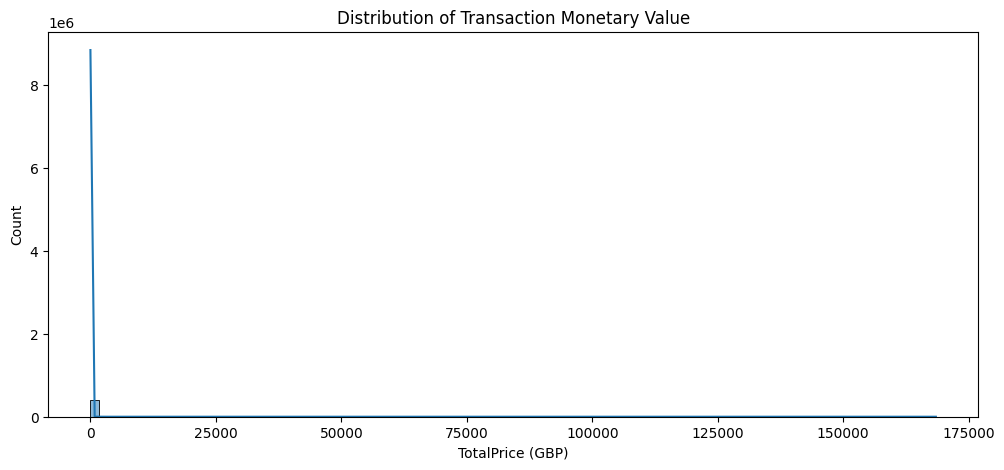

In [ ]:
## 1. Distribution of monetary values (TotalPrice)
plt.figure(figsize=(12,5))
sns.histplot(cleaned_df["SalesTotal"], bins=100, kde=True)
plt.title("Distribution of Transaction Monetary Value")
plt.xlabel("TotalPrice (GBP)")
plt.show()

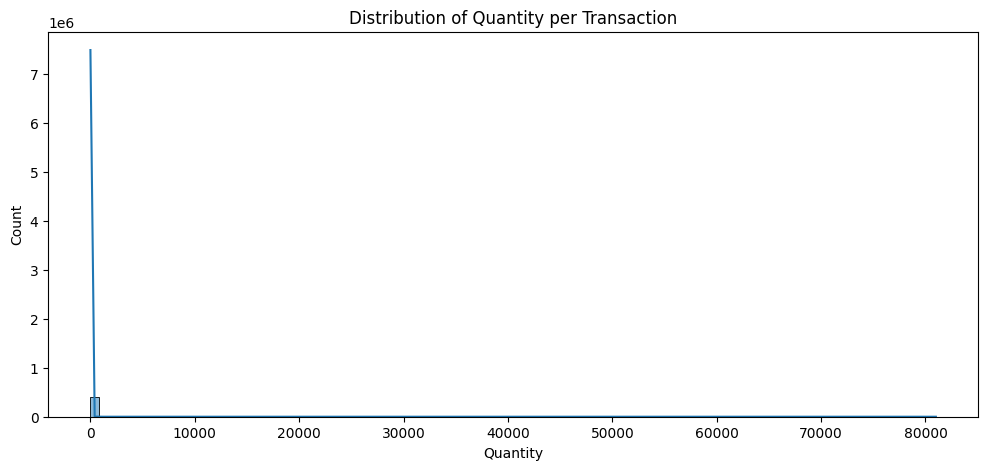

In [ ]:
## 2. Distribution of quantities
plt.figure(figsize=(12,5))
sns.histplot(cleaned_df["Quantity"], bins=100, kde=True)
plt.title("Distribution of Quantity per Transaction")
plt.xlabel("Quantity")
plt.show()

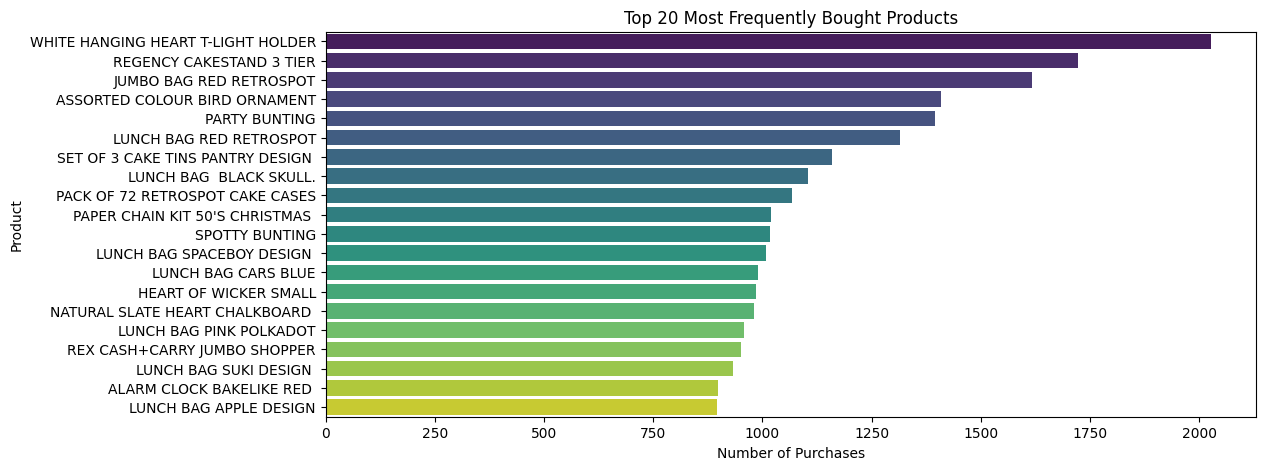

In [ ]:
## 3. Distribution of products (by frequency)
top_products = cleaned_df["Description"].value_counts().head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 20 Most Frequently Bought Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.show()

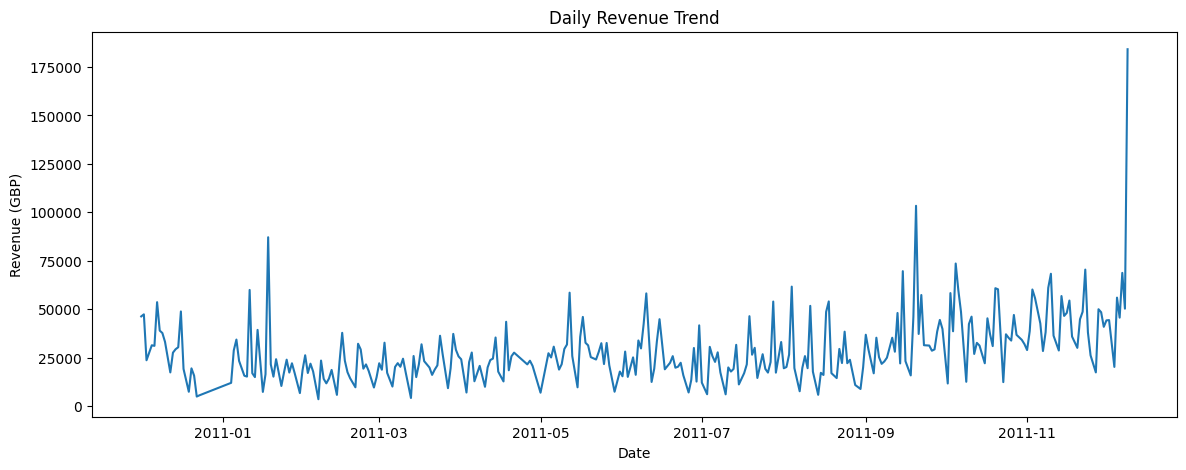

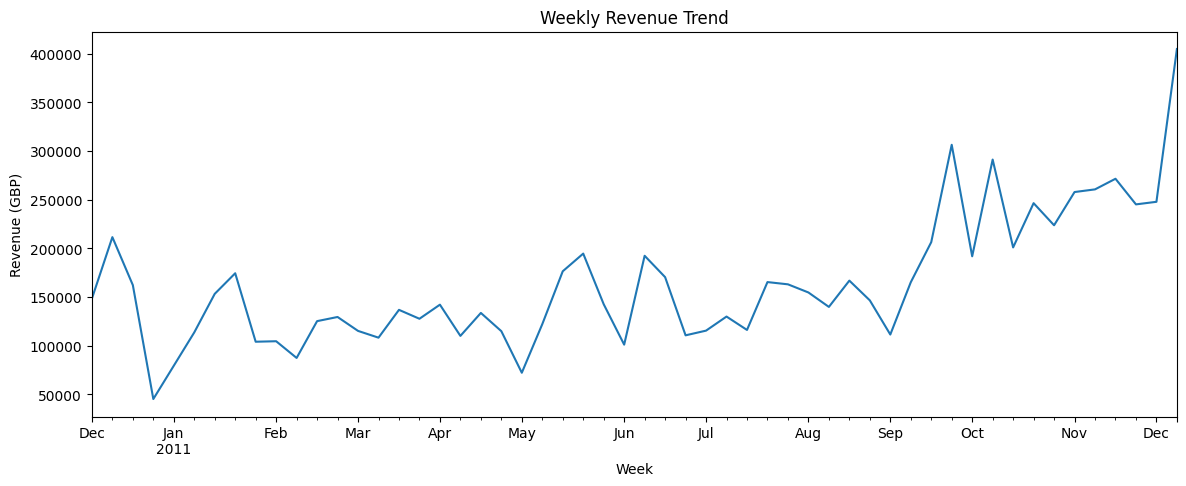

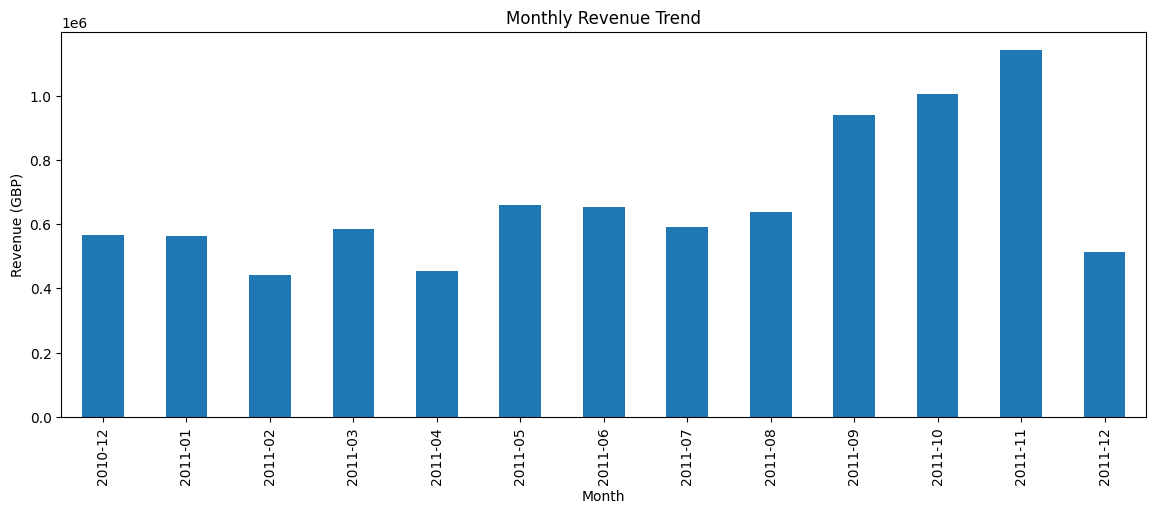

In [ ]:
## 4. Time-based patterns (daily/weekly/monthly)
cleaned_df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
cleaned_df["InvoiceDay"] = df["InvoiceDate"].dt.date
cleaned_df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

# Daily
daily_revenue = cleaned_df.groupby("InvoiceDay")["SalesTotal"].sum()
plt.figure(figsize=(14,5))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (GBP)")
plt.show()

# Weekly
df["InvoiceWeek"] = cleaned_df["InvoiceDate"].dt.to_period("W")

weekly_revenue = df.groupby("InvoiceWeek")["SalesTotal"].sum()

plt.figure(figsize=(14,5))
weekly_revenue.plot()
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Revenue (GBP)")
plt.show()

# Monthly
monthly_revenue = cleaned_df.groupby("InvoiceMonth")["SalesTotal"].sum()
monthly_revenue.plot(kind="bar", figsize=(14,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (GBP)")
plt.show()

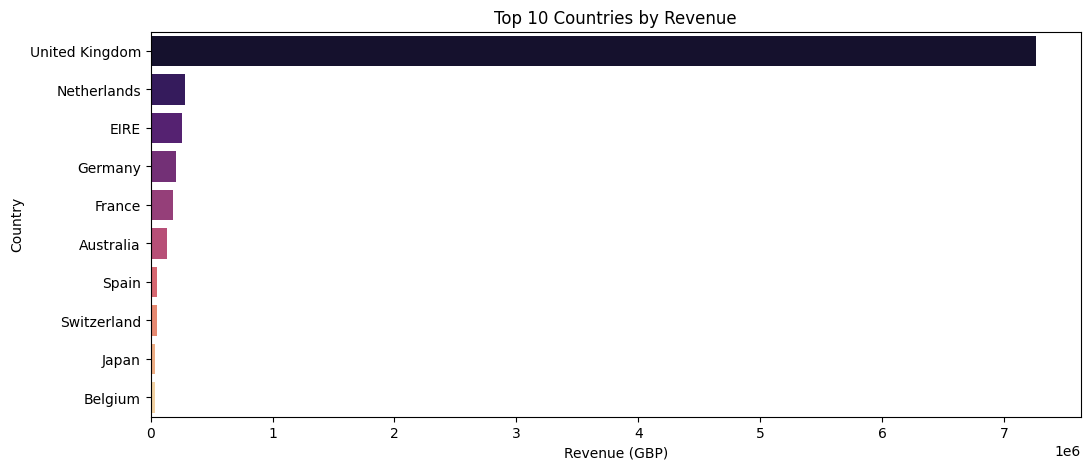

In [ ]:
## 5. Country/location analysis
country_revenue = cleaned_df.groupby("Country")["SalesTotal"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (GBP)")
plt.ylabel("Country")
plt.show()

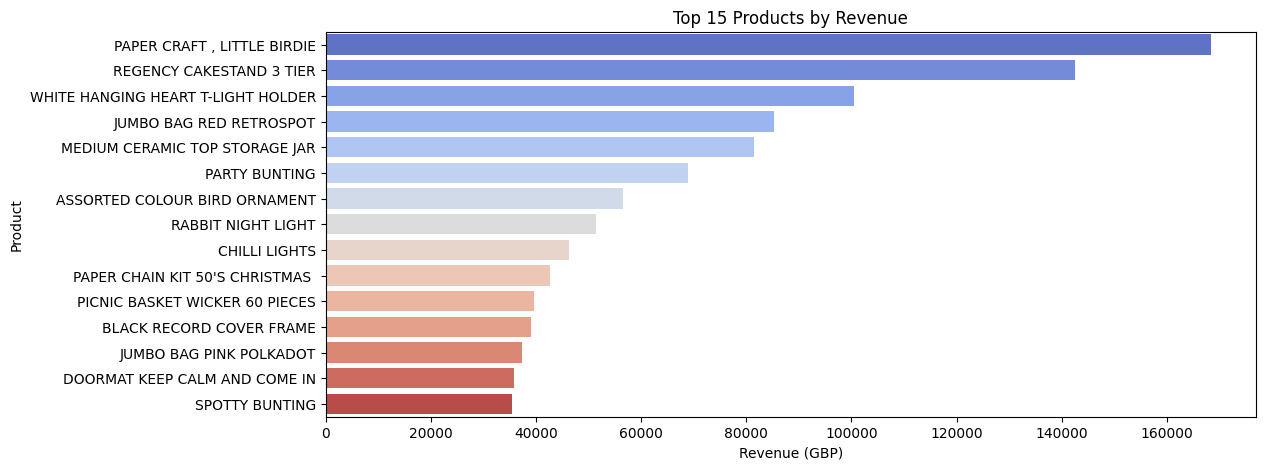

In [ ]:
## 6. Product category analysis (StockCode/Description)
# ở dataset này không có category sẵn, ta tạm dùng top products thay category proxy
product_revenue = cleaned_df.groupby("Description")["SalesTotal"].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,5))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette="coolwarm")
plt.title("Top 15 Products by Revenue")
plt.xlabel("Revenue (GBP)")
plt.ylabel("Product")
plt.show()

## Business Insights

In [ ]:
## 1. Revenue trends over time (already done: daily & monthly revenue)

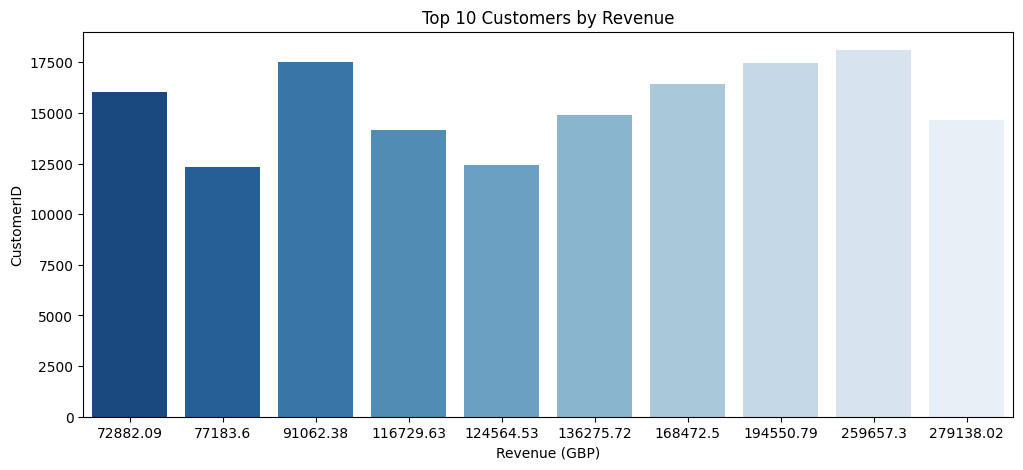

In [ ]:
## 2. Top customers
top_customers = cleaned_df.groupby("CustomerID")["SalesTotal"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues_r")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue (GBP)")
plt.ylabel("CustomerID")
plt.show()

In [ ]:
## 3. Top countries (done above), top products (done above)

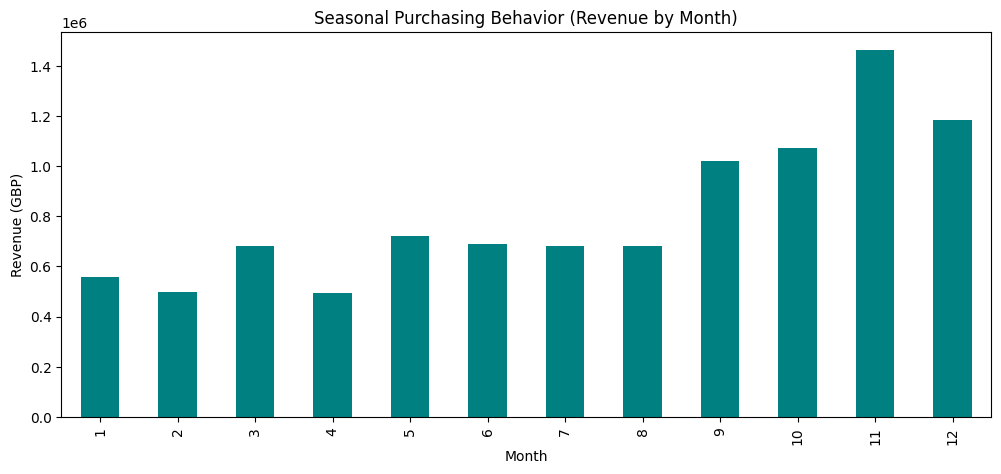

In [ ]:
## 4. Seasonal purchasing behavior (by month)
df["Month"] = df["InvoiceDate"].dt.month
monthly_sales = df.groupby("Month")["SalesTotal"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind="bar", color="teal")
plt.title("Seasonal Purchasing Behavior (Revenue by Month)")
plt.xlabel("Month")
plt.ylabel("Revenue (GBP)")
plt.show()

## Feature Engineering and Data Scaling


In [ ]:
aggregated_df = cleaned_df.groupby("CustomerID", as_index= False) \
    .agg(
        Monetary=("SalesTotal", "sum"),
        Frequency=("InvoiceNo", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df

,CustomerID,Monetary,Frequency,LastInvoiceDate
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
...,...,...,...,...
4329,18280.0,180.60,1,2011-03-07 09:52:00
4330,18281.0,80.82,1,2011-06-12 10:53:00
4331,18282.0,178.05,2,2011-12-02 11:43:00
4332,18283.0,2088.93,16,2011-12-06 12:02:00


In [ ]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


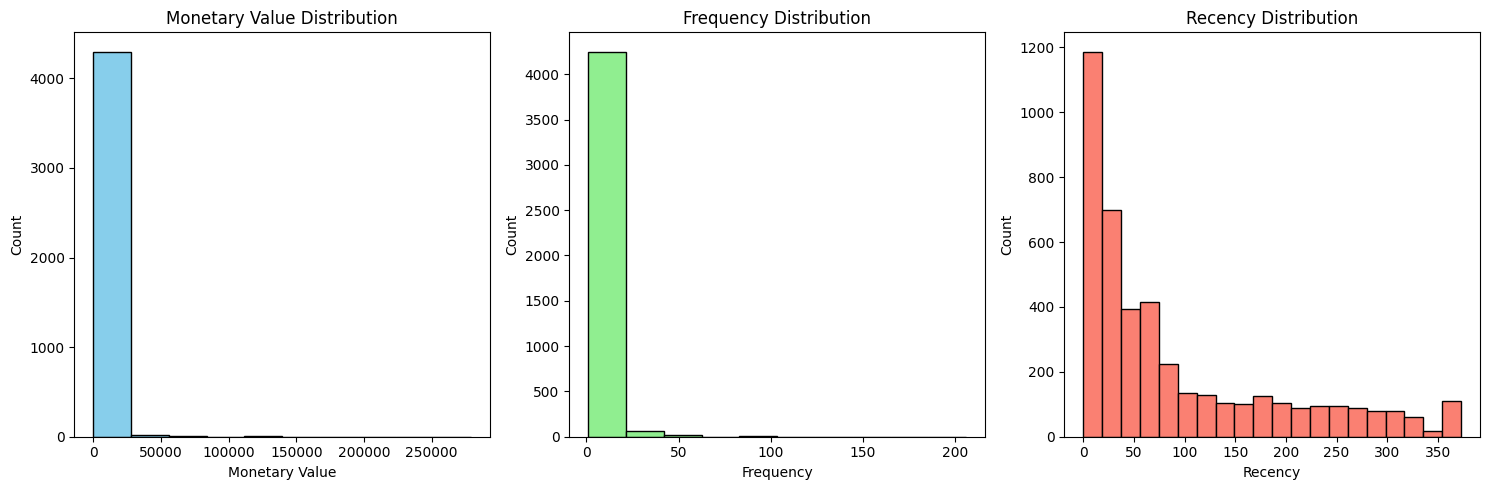

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Monetary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

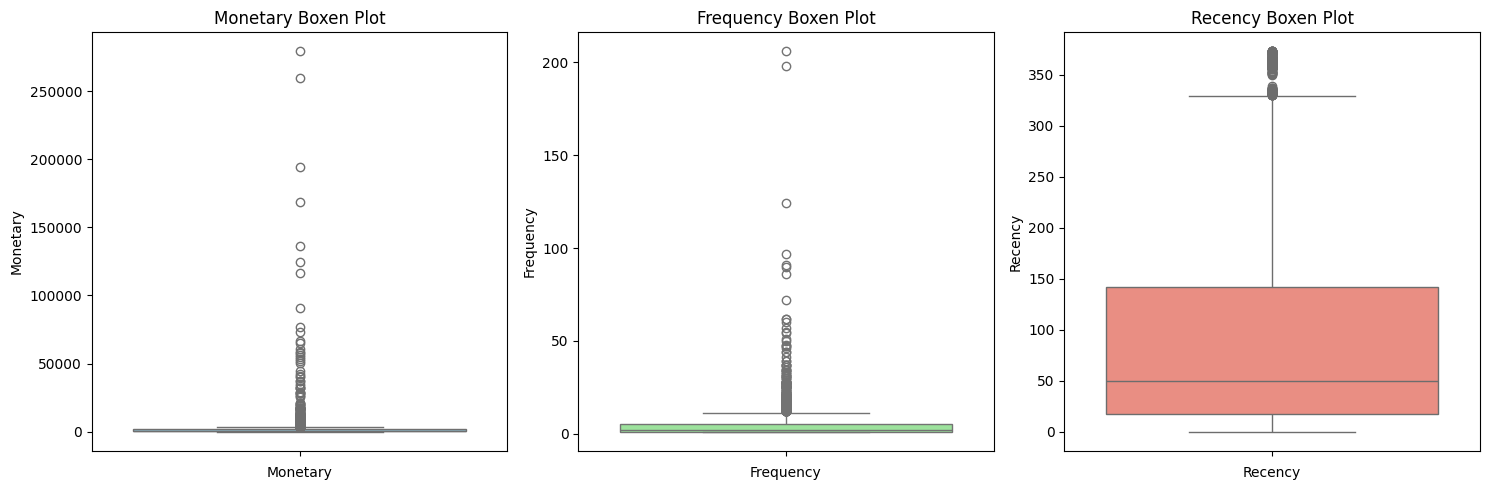

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['Monetary'], color='skyblue')
plt.title('Monetary Boxen Plot')
plt.xlabel('Monetary')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxen Plot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxen Plot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
Monetary_Q1 = aggregated_df['Monetary'].quantile(0.25)
Monetary_Q3 = aggregated_df['Monetary'].quantile(0.75)
Monetary_IQR = Monetary_Q3 - Monetary_Q1

Monetary_outliers_df = aggregated_df[(aggregated_df['Monetary'] > (Monetary_Q3 + 1.5 * Monetary_IQR)) | (aggregated_df['Monetary'] < (Monetary_Q1 - 1.5 * Monetary_IQR))].copy()

Monetary_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.066978,NaN,47.076383


In [ ]:
Frequency_Q1 = aggregated_df['Frequency'].quantile(0.25)
Frequency_Q3 = aggregated_df['Frequency'].quantile(0.75)
Frequency_IQR = Frequency_Q3 - Frequency_Q1

Frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (Frequency_Q3 + 1.5 * Frequency_IQR)) | (aggregated_df['Frequency'] < (Frequency_Q1 - 1.5 * Frequency_IQR))].copy()

Frequency_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.166586,NaN,30.366616


In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_outliers_df.index)) & (~aggregated_df.index.isin(Frequency_outliers_df.index))]

non_outliers_df.describe()

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863.000000
mean,15323.852705,853.814417,2.755113,2011-08-31 01:42:04.721718784,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.731704,794.608100,2.168124,NaN,101.866688


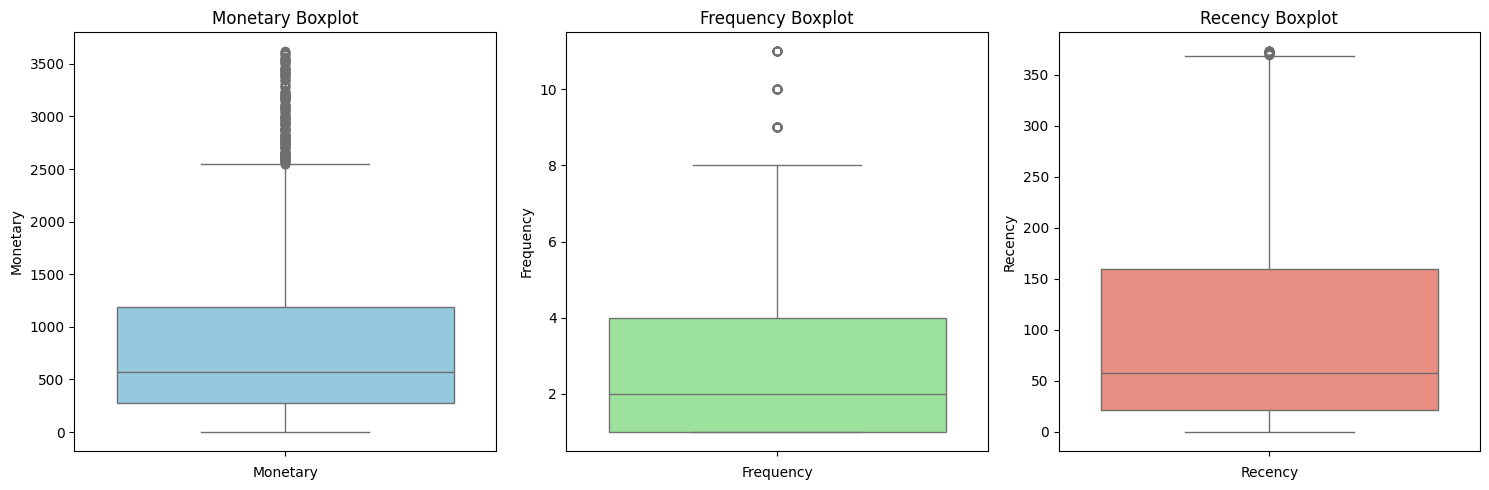

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['Monetary'], color='skyblue')
plt.title('Monetary Boxplot')
plt.xlabel('Monetary')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['Monetary', 'Frequency', 'Recency']])

scaled_data_df = pd.DataFrame(scaled_data, index =non_outliers_df.index, columns=['Monetary', 'Frequency', 'Recency'])

scaled_data_df

,Monetary,Frequency,Recency
2,0.734326,0.574252,-0.254717
3,0.759889,-0.809612,-0.804526
4,-0.704104,-0.809612,2.052518
5,0.669505,1.958116,-0.637620
6,-0.962630,-0.809612,1.011808
...,...,...,...
4328,-0.855771,-0.809612,-0.264535
4329,-0.847338,-0.809612,1.738342
4330,-0.972926,-0.809612,0.785993
4331,-0.850547,-0.348324,-0.912525


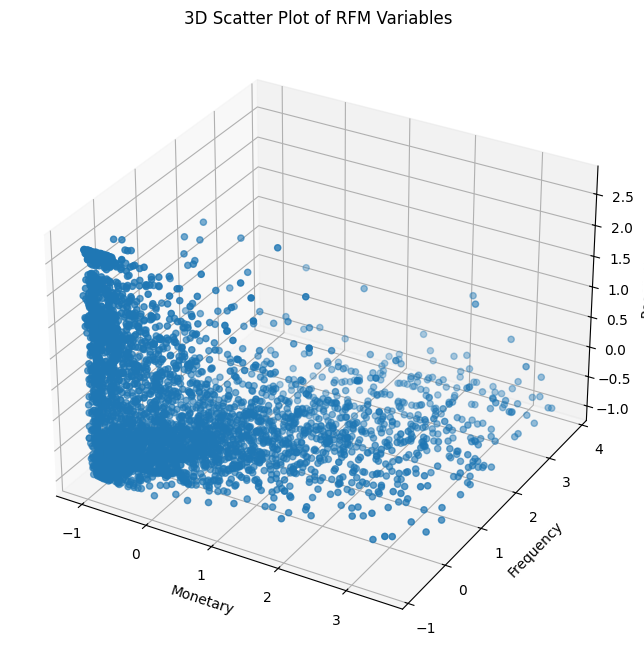

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['Monetary'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of RFM Variables')
plt.show()

#Step 5: Clustering

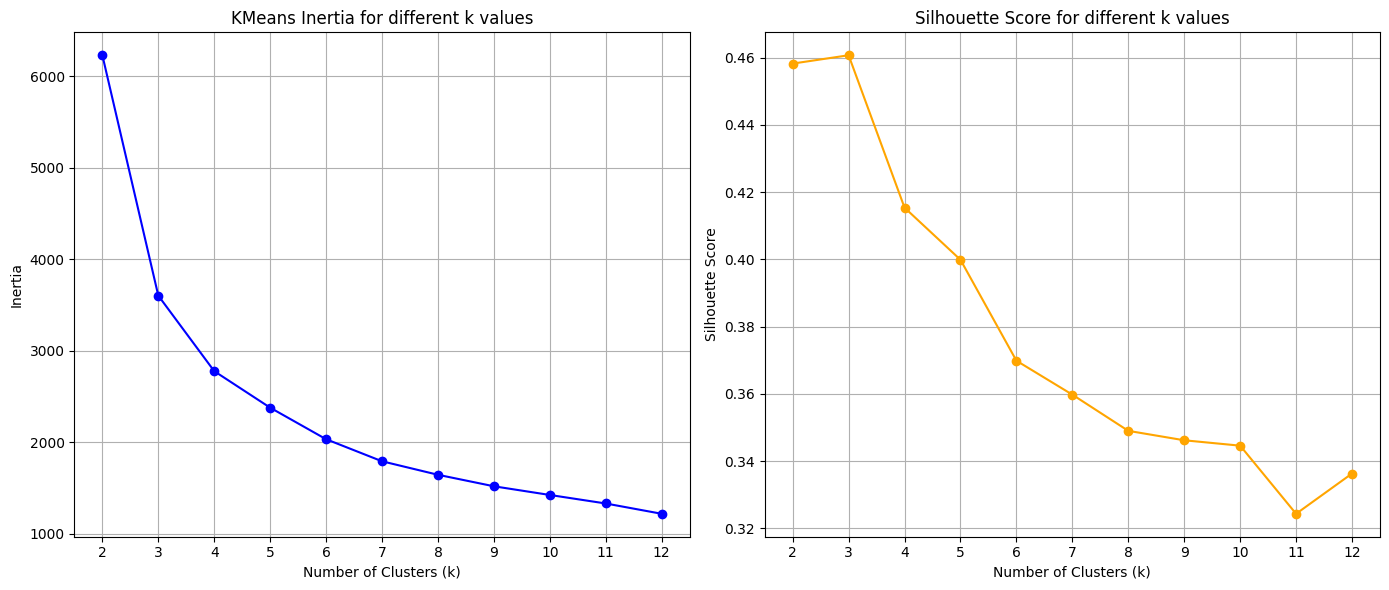

In [ ]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = k_means.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(k_means.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('KMeans Inertia for different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### Determining the Optimal Number of Clusters (k)

To identify the most appropriate number of clusters for our K-Means model, we applied two well-established evaluation techniques: the **Elbow Method** and **Silhouette Analysis**. We tested values of *k* from 2 to 12 and analyzed the results using the following metrics:

---

### Elbow Method – Inertia Plot

The **inertia** measures the internal coherence of clusters. Lower values indicate tighter, more compact clusters. In the inertia plot, we observed a significant drop in inertia from **k = 2 to k = 4**, after which the curve began to flatten. This pattern suggests the "elbow" point at **k = 4**, indicating that increasing the number of clusters beyond this value yields only marginal improvement in cluster compactness.

> **Insight:** The elbow at **k = 4** represents a good trade-off between model complexity and performance, avoiding overfitting while maintaining tight clusters.

---

### Silhouette Score Analysis

The **silhouette score** quantifies how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined clusters. While the highest silhouette score was observed at **k = 3**, the score at **k = 4** remained reasonably high (approximately **0.42**).

> **Insight:** Although *k = 3* had the highest silhouette score, choosing *k = 4* provided more nuanced segmentation while still maintaining strong inter-cluster separation.

---

### Final Decision: k = 4

Considering both metrics together:

- **Inertia** showed diminishing returns after *k = 4*.
- **Silhouette score** remained strong at *k = 4*.
- **Business logic** or segmentation needs might benefit from finer categorization than just 3 clusters.

Therefore, we selected **k = 4** as the optimal number of clusters, balancing compactness, separation, and interpretability.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels


array([3, 0, 1, ..., 1, 0, 3], dtype=int32)

In [ ]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,73,0
4329,18280.0,180.60,1,2011-03-07 09:52:00,277,1
4330,18281.0,80.82,1,2011-06-12 10:53:00,180,1
4331,18282.0,178.05,2,2011-12-02 11:43:00,7,0


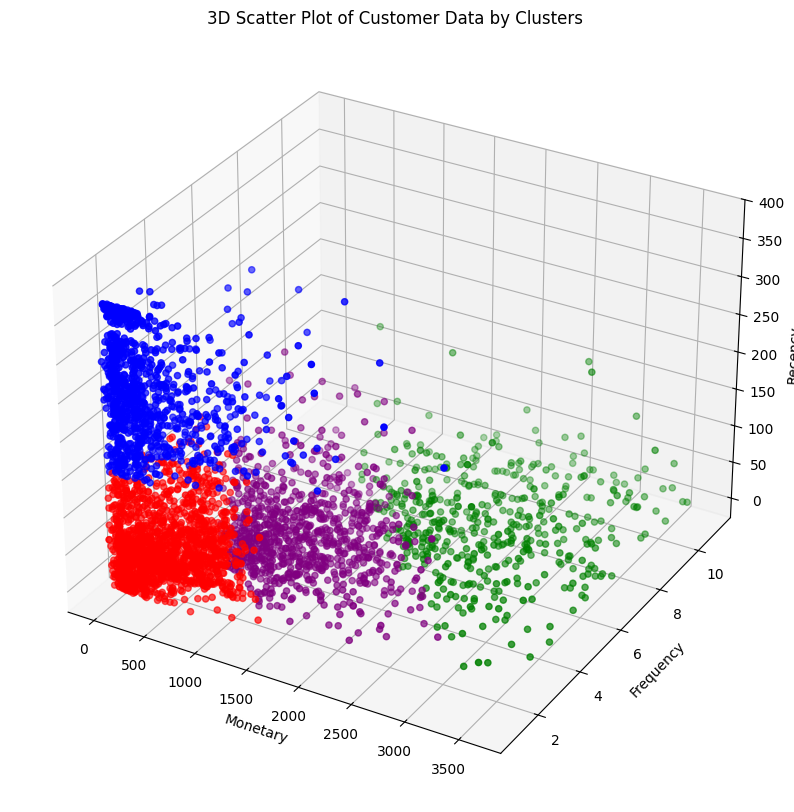

In [ ]:
cluster_colors = {0: 'red',
                  1: 'blue',
                  2: 'green',
                  3: 'purple'}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['Monetary'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker ='o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Clusters')

plt.show()

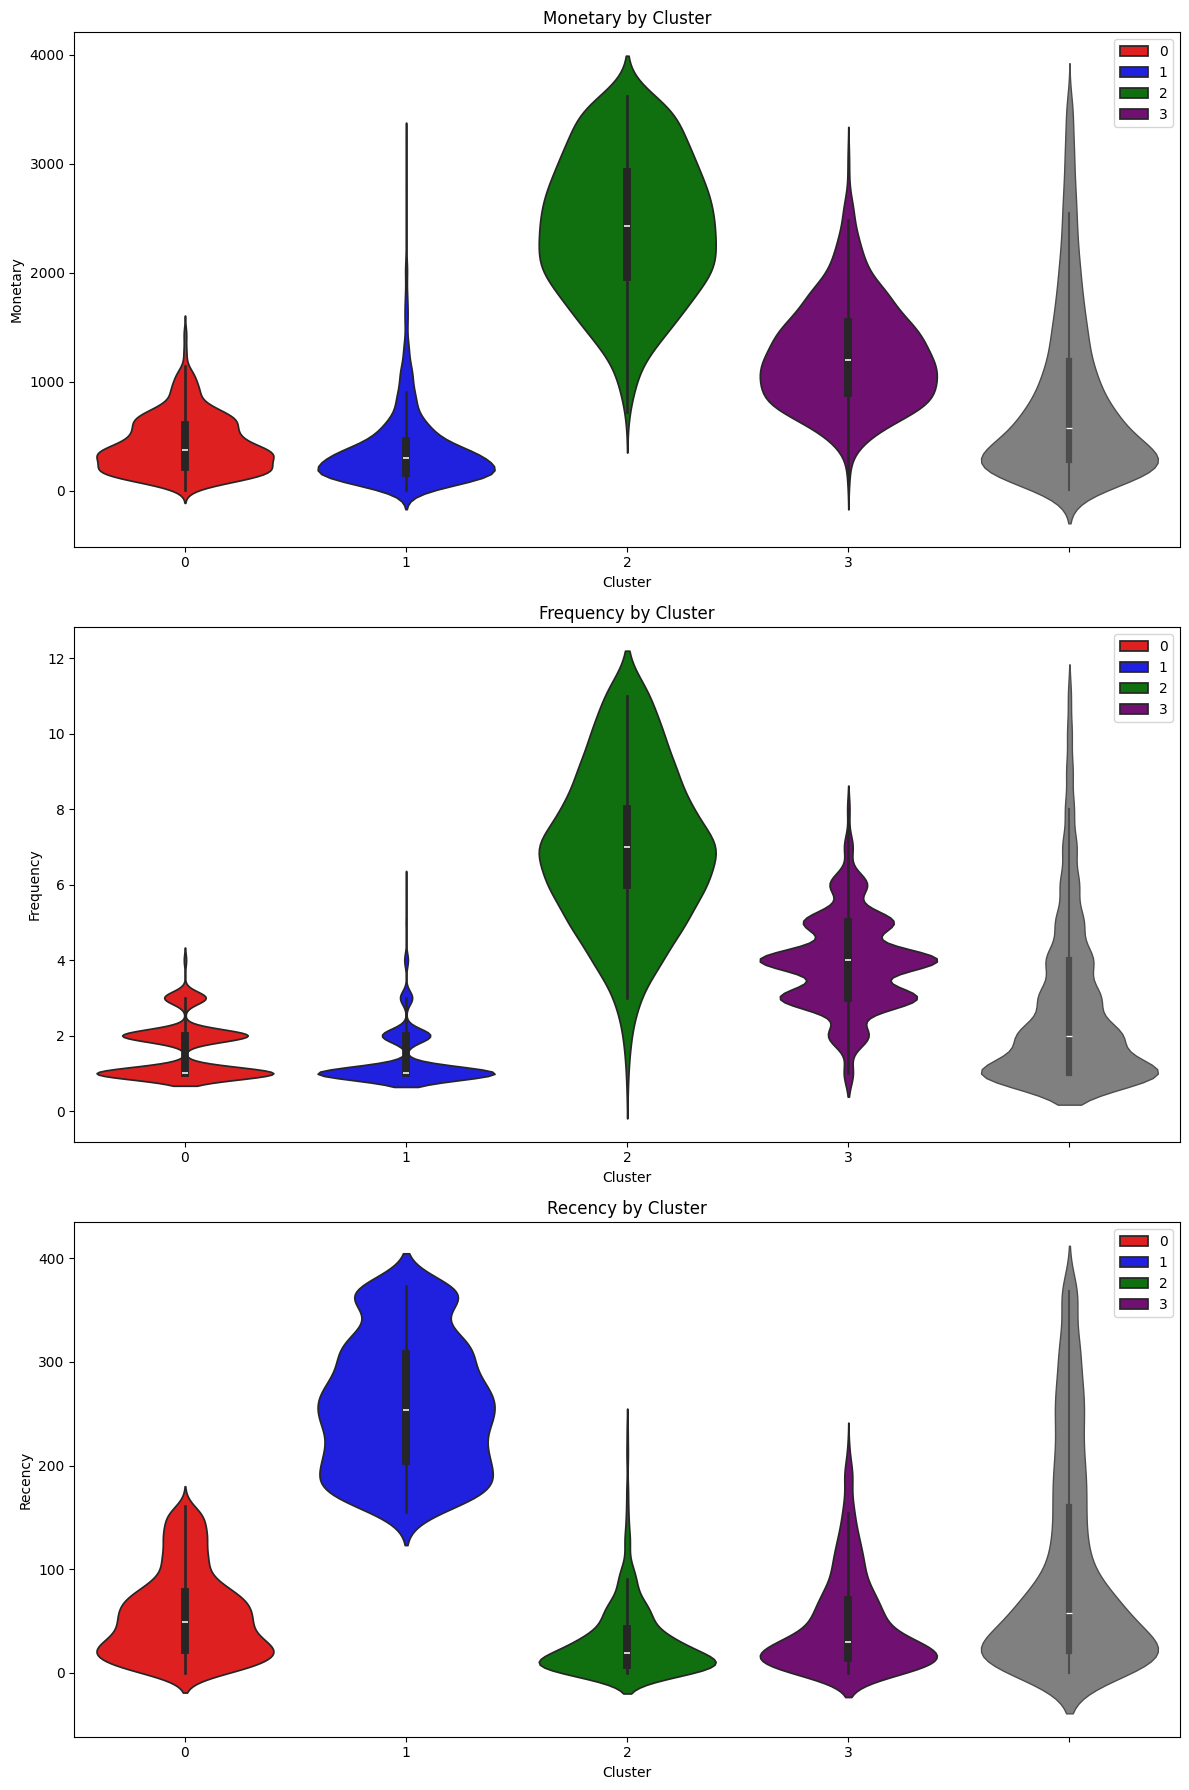

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Monetary'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary by Cluster')
plt.ylabel('Monetary')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue = non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Interpretation
### 1. Cluster 0 (Red): "Nurture"

- **Rationale**: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.  
- **Action**: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

---

### 2. Cluster 1 (Blue): "Re-Engage"

- **Rationale**: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.  
- **Action**: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

---

### 3. Cluster 2 (Green): "Reward"

- **Rationale**: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.  
- **Action**: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

---

### 4. Cluster 3 (Purple): "Retain"

- **Rationale**: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are our most valuable customers, and rewarding them is the way to maintain their engagement.
- **Action**: Implement robust loyalty programs, provide exclusive offers and deals, and recognize their loyalty to keep them satisfied.

### **Summary of Cluster Names**:
- **Cluster 0 (Red)**: "Nurture"  
- **Cluster 1 (Blue)**: "Re-Engage"  
- **Cluster 2 (Green)**: "Reward"  
- **Cluster 3 (Purple)**: "Retain"

## Outlier Analysis

In [ ]:
overlap_indices = Monetary_outliers_df.index.intersection(Frequency_outliers_df.index)
overlap_indices

Index([  55,   69,   75,  100,  103,  155,  189,  223,  272,  273,
       ...
       4153, 4175, 4197, 4202, 4209, 4248, 4268, 4287, 4289, 4293],
      dtype='int64', length=232)

In [ ]:
monetary_only_outliers = Monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = Frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = Monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3


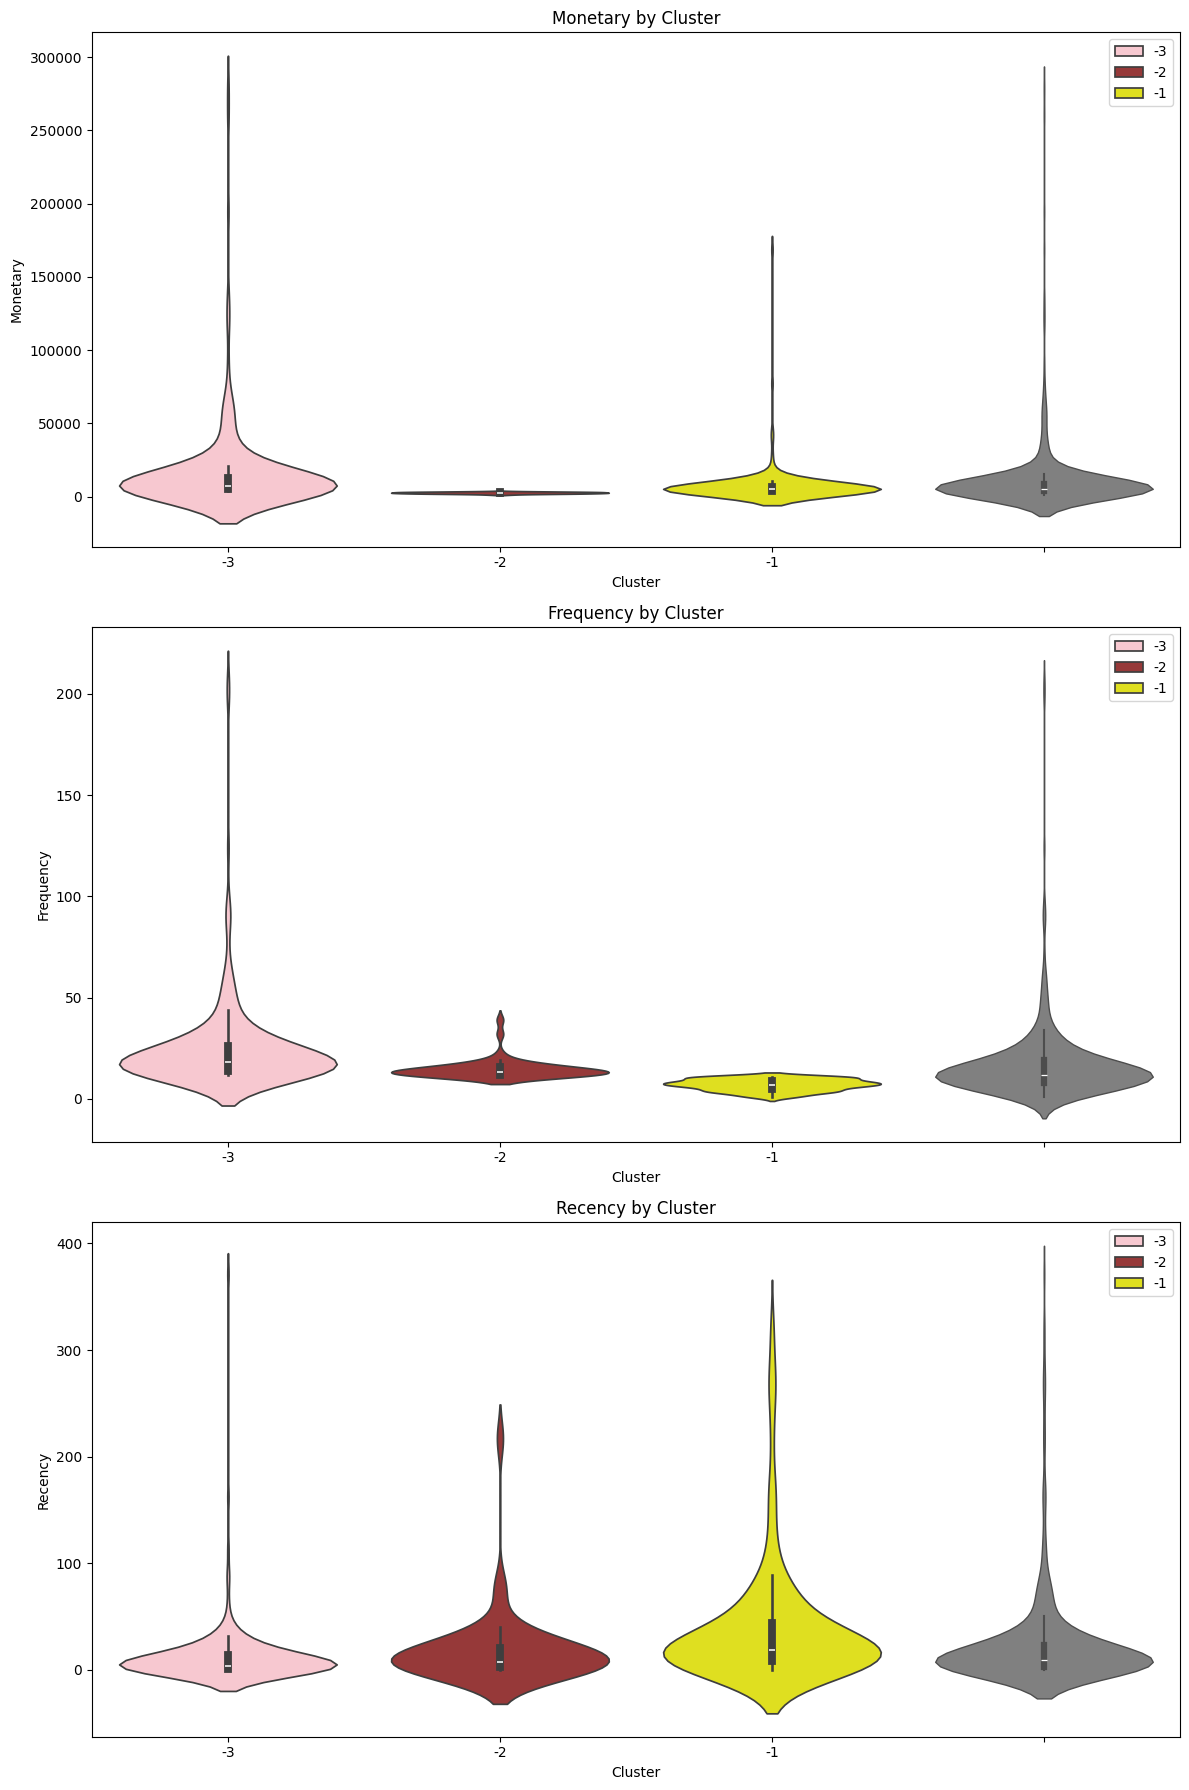

In [ ]:
outlier_cluster_colors = {
    -1: "yellow",
    -2: "brown",
    -3: "pink"
}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Monetary'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Monetary by Cluster')
plt.ylabel('Monetary')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=outlier_cluster_colors, hue = outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

- **Cluster -1 (Monetary Outliers) – PAMPER**  
  **Characteristics:** High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.  
  **Potential Strategy:** Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) – UPSELL**  
  **Characteristics:** Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.  
  **Potential Strategy:** Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) – DELIGHT**  
  **Characteristics:** The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.  
  **Potential Strategy:** Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [ ]:
cluster_labels = {
    -1: 'Pamper',
    -2: 'Upsell',
    -3: 'Delight',
    0: "Nurture",
    1: "Re-engage",
    2: "Reward",
    3: "Retain"
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df['Cluster_Label'] = full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,CustomerID,Monetary,Frequency,LastInvoiceDate,Recency,Cluster,Cluster_Label
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3,Retain
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,0,Nurture
4,12350.0,294.40,1,2011-02-02 16:01:00,309,1,Re-engage
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,2,Reward
6,12353.0,89.00,1,2011-05-19 17:47:00,203,1,Re-engage
...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,14,-3,Delight
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,Delight
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,Delight
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,Delight


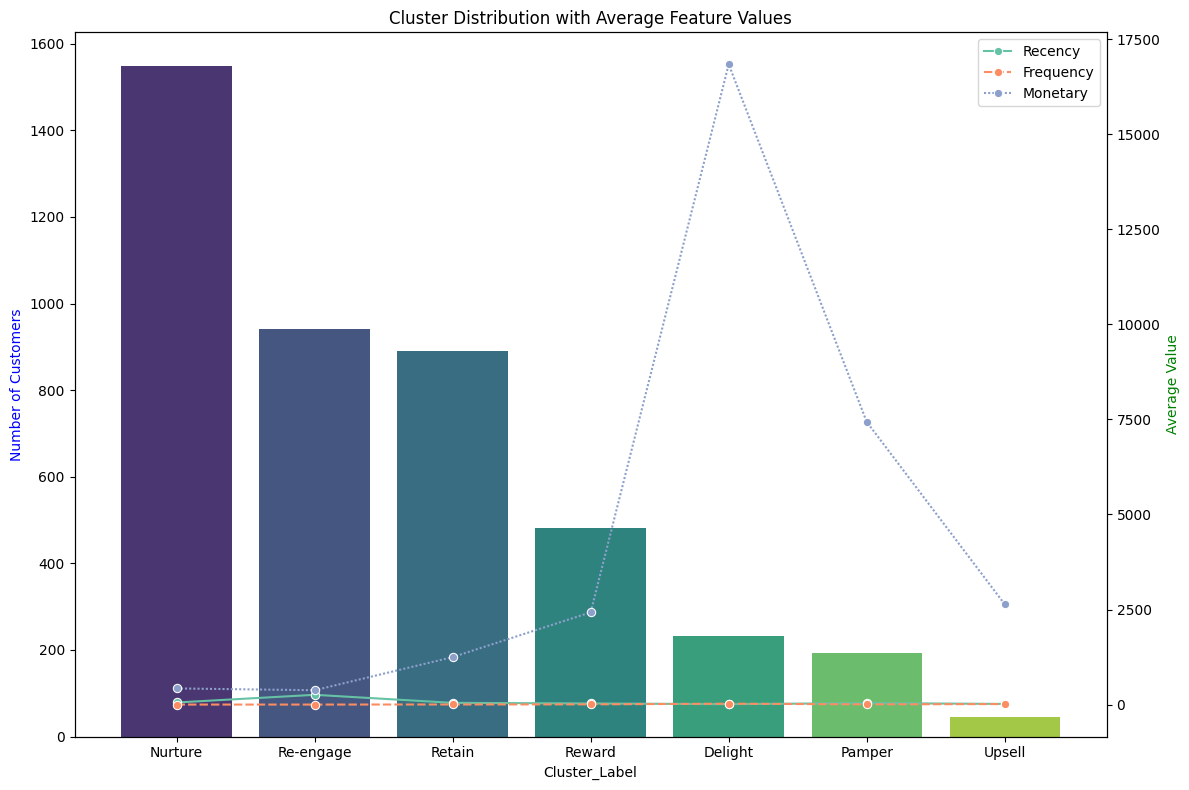

In [ ]:
cluster_counts = full_clustering_df['Cluster_Label'].value_counts()
feature_means = full_clustering_df.groupby('Cluster_Label')[['Recency', 'Frequency', 'Monetary']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.tight_layout()
plt.show()

# Step 6: Model Evaluation

In [ ]:
# Evaluate the clustering of non-outliers
silhouette_non_outliers = silhouette_score(scaled_data_df, non_outliers_df['Cluster'])
calinski_harabasz_non_outliers = calinski_harabasz_score(scaled_data_df, non_outliers_df['Cluster'])

print("Evaluation for Non-Outlier Clusters:")
print(f"Silhouette Score: {silhouette_non_outliers:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_non_outliers:.4f}")

# Evaluate the clustering of outliers
# Scale the outlier data first
outlier_scaled_data = scaler.fit_transform(outlier_clusters_df[['Monetary', 'Frequency', 'Recency']])
outlier_scaled_data_df = pd.DataFrame(outlier_scaled_data, index = outlier_clusters_df.index, columns=['Monetary', 'Frequency', 'Recency'])

silhouette_outliers = silhouette_score(outlier_scaled_data_df, outlier_clusters_df['Cluster'])
calinski_harabasz_outliers = calinski_harabasz_score(outlier_scaled_data_df, outlier_clusters_df['Cluster'])

print("\nEvaluation for Outlier Clusters:")
print(f"Silhouette Score: {silhouette_outliers:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_outliers:.4f}")

Evaluation for Non-Outlier Clusters:
Silhouette Score: 0.4154
Calinski-Harabasz Index: 4080.0986

Evaluation for Outlier Clusters:
Silhouette Score: -0.1657
Calinski-Harabasz Index: 30.3259
